# Домашнее задание. Решение конкурса на kaggle.com

# Первая часть. Исследование

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [2]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

Downloading...
From: https://drive.google.com/uc?id=1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K
To: /content/train.csv
100% 664k/664k [00:00<00:00, 17.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r
To: /content/test.csv
100% 218k/218k [00:00<00:00, 47.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y
To: /content/submission.csv
100% 14.7k/14.7k [00:00<00:00, 13.7MB/s]


In [3]:
data = pd.read_csv('./train.csv')

In [4]:
# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

Для начала посмотрим, что вообще представляет из себя наш датасет. Для этого посмотрим на 5 случайных строк:

In [5]:
data.sample(frac=1).head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1756,71,106.00,7723.7,Male,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),1
190,63,99.70,6330.4,Male,0,Yes,No,Yes,No,Fiber optic,Yes,No,Yes,No,Yes,Yes,Two year,No,Credit card (automatic),0
1702,31,98.05,3082.1,Male,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,No,One year,No,Bank transfer (automatic),0
845,45,93.90,4200.25,Male,1,No,No,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),0
418,58,50.30,2878.55,Male,0,Yes,No,Yes,No,DSL,No,No,Yes,No,No,No,One year,No,Credit card (automatic),0


Далее оценим количество объектов и признаков в датасете:

In [6]:
data.shape

(5282, 20)

При помощи метода info() посмотрим на тип данных каждого признака, а также на наличие NaN'ов 

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

Хмм, NaN'ов не обнаружено, но зато видим, что номинально численный признак TotalSpent имеет тип object, т.е. на самом деле является строкой. Попробуем всюду заменить строки, состоящие только из пробельных символов (в т.ч. пустые) на Nan'ы, и посмотрим что получится:

In [8]:
data.replace(r'^\s*$', np.nan, regex=True, inplace = True)
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

Ага, в столбце TotalSpent было 9 пустых строк, которые мы теперь преобразовали к NaN. Это очень маленькая доля от общего количества, поэтому просто выбрасываем эти строки и преобразуем признак TotalSpent к типу float

In [9]:
data['TotalSpent'] = data['TotalSpent'].astype(float)
data = data.dropna()

## Анализ данных (3 балла)

1) Для численных признаков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

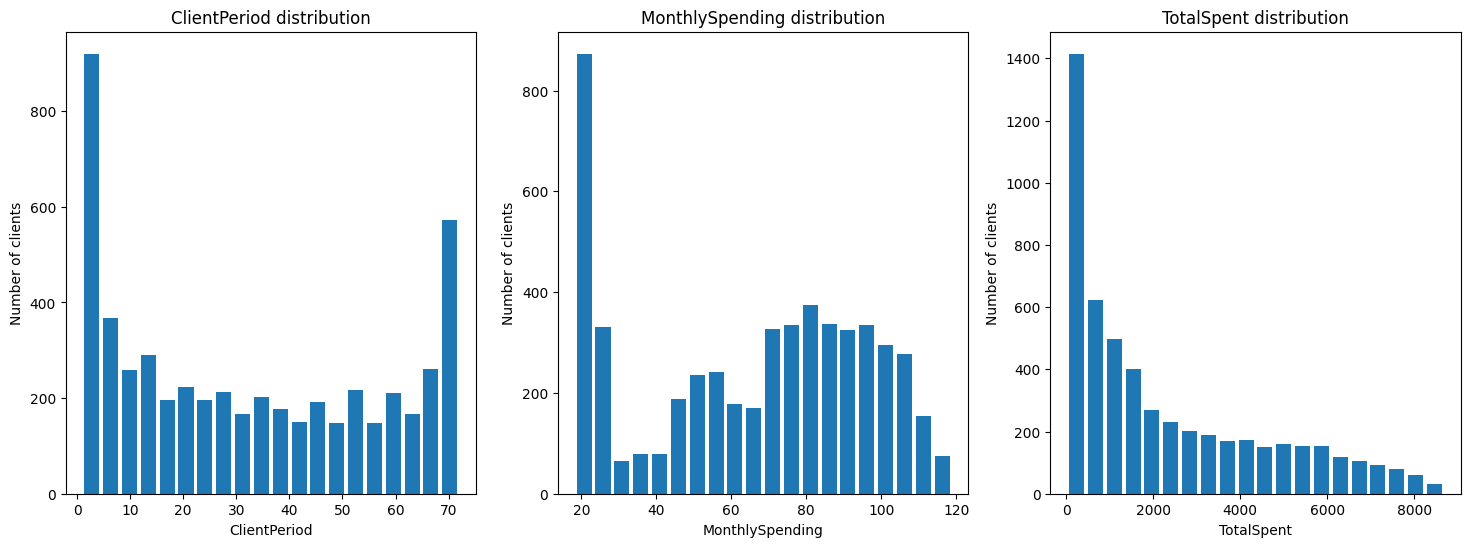

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

for i, col in enumerate(num_cols):
  ax[i].set_title(str(col) + ' distribution')
  ax[i].set_xlabel(str(col))
  ax[i].set_ylabel('Number of clients')
  ax[i].hist(data[col], bins=20, rwidth=0.8)

По столбчатым гистограммам особо не получается сделать никаких выводов...
Посмотрим на распределение значений для категориальных признаков:

In [11]:
for col in cat_cols:
    print(f"{col} DISTRIBUTION")
    print(data[col].value_counts())
    print()

Sex DISTRIBUTION
Male      2651
Female    2622
Name: Sex, dtype: int64

IsSeniorCitizen DISTRIBUTION
0    4431
1     842
Name: IsSeniorCitizen, dtype: int64

HasPartner DISTRIBUTION
No     2704
Yes    2569
Name: HasPartner, dtype: int64

HasChild DISTRIBUTION
No     3676
Yes    1597
Name: HasChild, dtype: int64

HasPhoneService DISTRIBUTION
Yes    4754
No      519
Name: HasPhoneService, dtype: int64

HasMultiplePhoneNumbers DISTRIBUTION
No                  2508
Yes                 2246
No phone service     519
Name: HasMultiplePhoneNumbers, dtype: int64

HasInternetService DISTRIBUTION
Fiber optic    2341
DSL            1795
No             1137
Name: HasInternetService, dtype: int64

HasOnlineSecurityService DISTRIBUTION
No                     2611
Yes                    1525
No internet service    1137
Name: HasOnlineSecurityService, dtype: int64

HasOnlineBackup DISTRIBUTION
No                     2331
Yes                    1805
No internet service    1137
Name: HasOnlineBackup, dty

Очень интересно, но ничего непонятно. Визуализируем при помощи matlotlib:

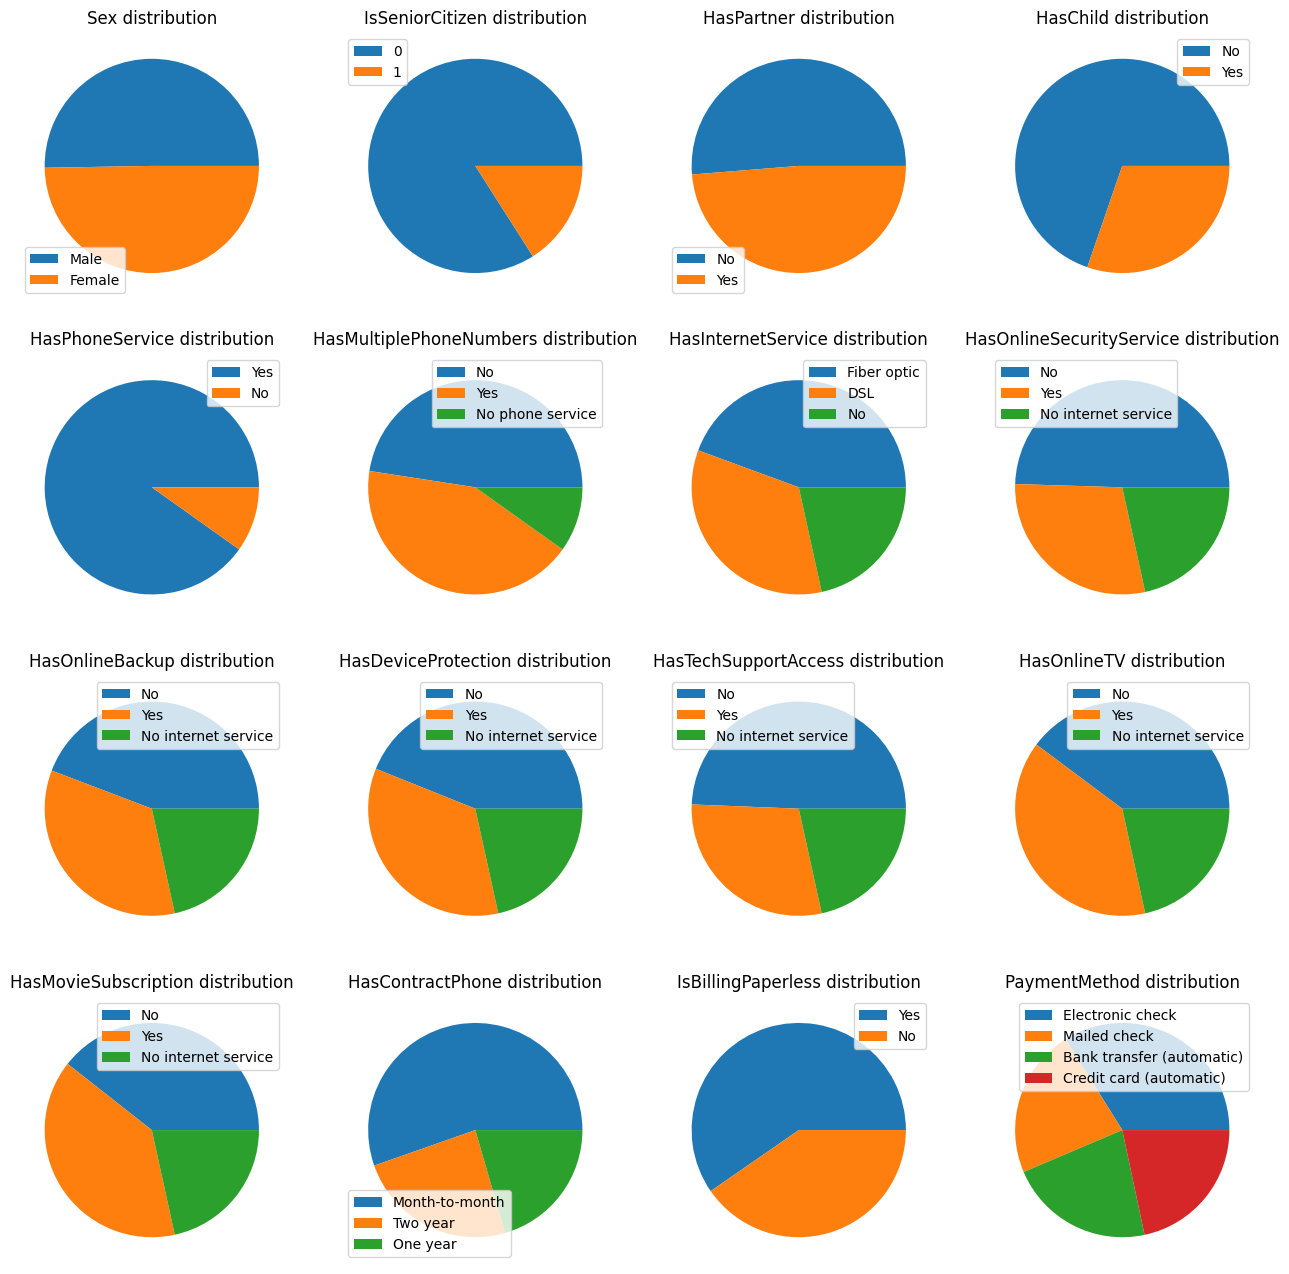

In [12]:
fig, ax = plt.subplots(4, 4, figsize=(16,16))
axes = ax.flat #выпрямляем двумерный массив в одномерный, чтоб в дальнейшем итерироваться по нему единственным индексом

for i, col in enumerate(cat_cols):
    value_counts = data[col].value_counts()
    axes[i].pie(value_counts)
    axes[i].set_title(f'{col} distribution')
    axes[i].legend(value_counts.index)

Так гораздо лучше! Возьмём на заметку, что у многих категориальных признаков на самом деле всего 2-3 варианта значения, включая "Yes" и "No". Такие признаки легко преобразовать к численным без увеличения размерности

In [13]:
data[target_col].value_counts()

0    3889
1    1384
Name: Churn, dtype: int64

Классы более-менее сбалансированы, применять специальные методы не требуется

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [14]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

В последнем задании мы хотим воспользоваться библиотекой CatBoost, а для неё нужны данные с категориальными признаками в исходном виде. Поэтому заранее сделаем копию на будущее:

In [15]:
data_origin = data.copy()

Разделим категориальные фичи на те, которые легко интуитивно преобразовать к численным, и те, для которых придётся испольвать one-hot-encoding. Для первой категории фичей преобразуем 'Yes' к единице, 'No' к нулю, а всё остальное - к минус единице

In [16]:
d = {'Yes' : 1, 'No' : 0, 'No internet service': -1, 'No phone service': -1}

pseudo_binary_cols = [
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'IsBillingPaperless'    
]

truly_cat_cols = [
    'Sex',
    'HasInternetService',
    'HasContractPhone',
    'PaymentMethod'
]

#Проверим, что не забыли никакие фичи:
assert set(pseudo_binary_cols + truly_cat_cols + ['IsSeniorCitizen']) == set(cat_cols), 'Где-то ошибка...'

for col in pseudo_binary_cols:
    data[col] = data[col].map(d)

In [17]:
data = pd.get_dummies(data, columns=cat_cols)

Только теперь, когда мы разделили категориальные фичи по значениям, будет уместно посмотреть на корреляции всех получившихся признаков с target'ом:

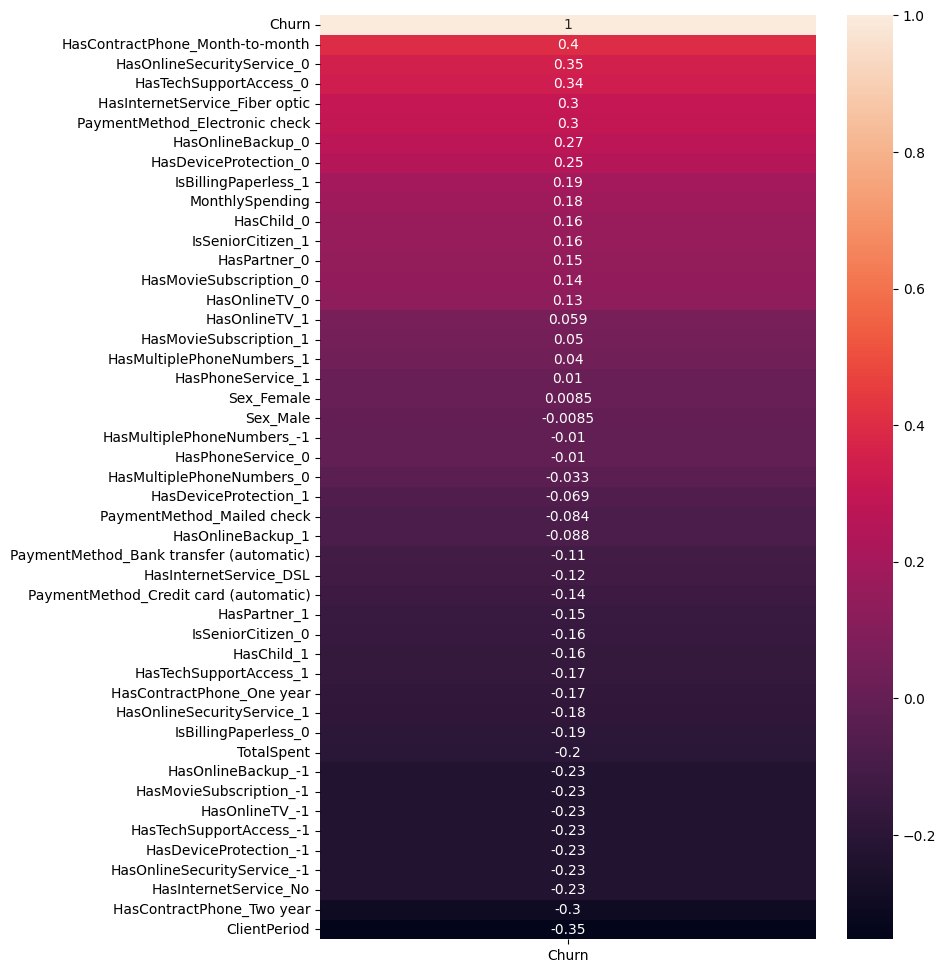

In [18]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(data.corr()[[target_col]].sort_values(by=target_col, ascending=False), annot=True)

Уже здесь можно сделать некоторые занятные выводы. Некоторые из них довольно ожидаемы - например, что чем дольше клиент пользуется услугами (ClientPeriod), тем меньше вероятность его потерять. Или что от нас скорее уйдёт пользователь с помесячным контрактом (HasContractPhone), чем с годовым или двухгодовым.

Но можно сделать и более интересные выводы - например видим, что есть некоторая корреляция между оттоком пользователей и отсутствием у них доступа к техподдержке (HasTechSupportAccess)

In [32]:
y = data[target_col]
X = data.drop(columns=target_col)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.25, random_state=42)

In [33]:
scaler = RobustScaler() 
scaler.fit(X_train) #Не забываем, что во избежание утечки данных нужно обучать scaler только на train-датасете

scaler.transform(X_train)
scaler.transform(X_valid);

Займёмся наконец обучением моделей. Модель LogisticRegressionCV позволяет подбирать гиперпараметр C прямо во время обучения (за это отвечает передаваемое значение Cs). Обучим логистическую регрессию на train-части и посмотрим roc-auc на validation-части:

In [35]:
regressor = LogisticRegressionCV(Cs=20, cv=5, scoring='roc_auc', n_jobs=-1, random_state=42)
regressor.fit(X_train, y_train)

predictions = regressor.predict_proba(X_valid)[:, 1] # [:, 0] вернёт вероятности принадлежности к 0 классу, а нам нужен 1 класс
roc_auc_score(y_valid, predictions)

0.8382993568741657

Ого, удалось сходу получить качество порядка ~0.83. Неплохо, но попробуем улучшить предсказания, использовав градиентный бустинг.

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с параметрами по умолчанию даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. Catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Используем для разделения данных датасет до one-hot-encoding'a и прочих преобразований

In [36]:
import catboost

y_orig = data_origin[target_col]
X_orig = data_origin.drop(columns=target_col)

X_train_orig, X_valid_orig, y_train_orig, y_valid_orig = train_test_split(X_orig, y_orig, test_size = 0.25, random_state=42)

cb_model = catboost.CatBoostClassifier(cat_features=cat_cols, verbose=0)

cb_model.fit(X_train_orig, y_train_orig)
catboost_pred = cb_model.predict_proba(X_valid_orig)[:, 1]

roc_auc_score(y_valid_orig, catboost_pred)



0.8396295959228248

Уже лучше. Попробуем ещё улучшить качество, воспользовавшись встроенным в Catboost рандомизированным поиском. Для этого зададим массивы значений для каждого гиперпараметра (возьмём learning rate, количество деревьев, максимальную глубину дерева и минимальный размер листа), а в саму модель передадим n_iter - число случайных комбинаций параметров, на которых наша модель будет кросс-валидироваться.

In [ ]:
model = catboost.CatBoostClassifier(silent=True,
                                    cat_features=cat_cols,
                                    eval_metric='AUC')


grid = {'learning_rate': np.arange(0.01, 0.1, 0.01),
        "n_estimators": [100, 250, 500, 1000, 2000],
        "max_depth": np.arange(4, 10, 2),
        "min_data_in_leaf": np.arange(20, 200, 20)}

random_search_result = model.randomized_search(
                  grid,
                  X_orig,
                  y_orig,
                  cv=3, #для ускорения работы будем использовать разбиение на 3 фолда вместо распространённых 5
                  n_iter=10,
                  refit=True,
                  verbose=10)


bestTest = 0.8623742959
bestIteration = 31

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.8623743	best: 0.8623743 (0)	total: 1.45s	remaining: 13s

bestTest = 0.8645983859
bestIteration = 96

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.

bestTest = 0.8637726464
bestIteration = 64

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.

bestTest = 0.8637726464
bestIteration = 64

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.

bestTest = 0.8645983859
bestIteration = 96

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.

bestTest = 0.8652373509
bestIteration

In [ ]:
print(random_search_result['params'])

{'min_data_in_leaf': 160, 'depth': 4, 'iterations': 250, 'learning_rate': 0.04}


Итого, оптимальное качество (порядка 0.86) получили с минимальным размером листа 160, максимальной глубиной дерева 4, суммарным кол-вом деревьев 250 и lr=0.04

# Предсказания

In [ ]:
best_model = model

Наконец, готовим наше решение к выгрузке. Параметр `index=False` используем, чтобы в результирующем датафрейме не задублировался столбец с номерами объектов

In [ ]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:, 1]
submission.to_csv('./my_submission.csv', index=False)